In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import os
from tpot import TPOTRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import *
from sklearn.svm import *
import re

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium.csv')
data

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,platforms,indé
0,1002,Rag Doll Kung Fu,fighting multiplayer 1980s realistic real_time...,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.306578,1,5.99,4949.0,1,1,22451.0,9,0.701754,57,4.536472,1,1,windows,0
1,2710,Act of War: Direct Action,action strategy rts 1980s relaxing,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.687556,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,1,1.99,4067.0,1,0,29159.0,4,0.845070,213,7.169658,98,7,windows,1
2,2720,ThreadSpace: Hyperbol,action strategy space 1980s relaxing,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.438656,0.016197,0.016197,0.016197,0.269795,1,3.99,4311.0,1,1,21720.0,9,0.775000,40,5.038274,16,2,windows,1
3,2780,ARMA: Combat Operations,action simulation shooter fps tactical,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,0.016200,0.016200,0.276788,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,1,5.99,4067.0,1,1,29546.0,8,0.653153,222,7.264814,23,15,windows,0
4,2850,X: Tension,simulation strategy space sci_fi space_sim,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.691257,0.016250,0.016250,0.016250,0.016250,1,3.49,3127.0,1,1,23225.0,6,0.760000,75,7.427247,8,8,windows,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,1,1,474.0,0,0.666667,3,13.941176,94,94,windows;mac;linux,0
21103,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,1,0,4426.0,2,0.954545,22,130.176471,3,1,windows,0
21104,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,1,0,890.0,5,0.400000,5,26.969697,29,1,windows,1
21105,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,1,0,58.0,1,1.000000,1,1.757576,2,2,windows,0


In [4]:
data2 = pd.read_csv('../raw_data/full_followers.csv')
data3 = pd.read_csv('../raw_data/full_youtube.csv')
data2 = data2.rename(columns={'steam_id': 'steam_appid'})
data = data.merge(data2,  on='steam_appid', how='inner')

In [5]:
data3.head(500)

,id,views,comments
0,1002,2.0,0.0
1,2710,4.0,0.0
2,2720,NaN,NaN
3,2780,NaN,NaN
4,2850,NaN,NaN
5,2900,NaN,NaN
6,3010,56.0,1.0
7,3050,46.0,1.0
8,3230,NaN,NaN
9,3510,NaN,NaN


In [6]:
data3=data3.fillna(value=0)
data3 = data3.rename(columns={'id': 'steam_appid'})
data = data.merge(data3,  on='steam_appid', how='inner')

In [7]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])
df1 = pd.DataFrame(platform_encoded)
data = data.join(df1)

In [8]:
#data.name = data.name.str.replace(r'[^\x00-\x7F]+', 'Nan')
#data = data[data.name != 'Nan']

In [9]:
data = data[data.price > 0.1]
data = data[data.price < 50]
data = data[data.days_on_steam < 2000]

In [32]:
data.sort_values(by='price').tail(20)

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,platforms,indé,followers,views,comments,0,1,2,3,4
17115,868410,DAISENRYAKU PERFECT 4.0/大戦略パーフェクト4.0,strategy simulation hex_grid wargame tanks,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.690030,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,0.016314,1,46.49,212.0,1,0,7338.0,8,0.194444,36,34.613208,1,1,windows,0,521,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8372,587260,Tokyo Xanadu eX+,rpg jrpg anime action_rpg great_soundtrack,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.015859,0.211725,0.015859,0.502810,0.015859,0.015859,1,46.49,509.0,1,1,20000.0,5,0.902676,411,39.292731,7,16,windows,1,15600,477.0,21.0,0.0,1.0,0.0,0.0,0.0
18455,915710,Little Dragons Café,adventure cute dragons 1980s remake,0.016575,0.258849,0.016575,0.016575,0.016575,0.016575,0.265632,0.016575,0.016575,0.016575,0.016575,0.016575,0.193741,0.016575,0.016575,0.016575,0.016575,0.016575,0.016575,0.016575,1,46.49,167.0,1,1,4426.0,3,0.681818,22,26.502994,7,1,windows,1,1763,186.0,18.0,0.0,1.0,0.0,0.0,0.0
16738,857320,SRPG Studio,game_development utilities design_&_illustrati...,0.182853,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.551519,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,0.014757,1,46.49,254.0,1,1,8586.0,5,0.880952,42,33.803150,1,1,windows,0,4502,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1978,347400,001 Game Creator,game_development design_&_illustration utiliti...,0.013759,0.013759,0.013759,0.013759,0.013759,0.013759,0.137382,0.013759,0.013759,0.013759,0.614947,0.013759,0.013759,0.013759,0.013759,0.013759,0.013759,0.013759,0.013759,0.013759,1,46.49,1388.0,1,1,20000.0,10,0.813953,129,14.409222,1,1,windows,0,4982,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3424,401890,ARSLAN: THE WARRIORS OF LEGEND,action anime hack_and_slash online_co_op local...,0.016135,0.016135,0.016135,0.016135,0.517651,0.016135,0.016135,0.016135,0.016135,0.016135,0.016135,0.016135,0.016135,0.191915,0.016135,0.016135,0.016135,0.016135,0.016135,0.016135,1,49.99,1177.0,1,1,20000.0,3,0.715847,183,16.992353,71,72,windows,0,9846,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9632,636570,Nights of Azure 2: Bride of the New Moon / よるの...,rpg sexual_content anime female_protagonist jrpg,0.015699,0.015699,0.015699,0.255082,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.015699,0.462329,0.015699,0.015699,1,49.99,554.0,1,1,20000.0,5,0.776256,219,36.101083,71,72,windows,0,13736,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7368,553520,Trainz Railroad Simulator 2019,simulation open_world driving trains realistic,0.016312,0.016312,0.016312,0.016312,0.016312,0.016312,0.016312,0.196191,0.016312,0.016312,0.016312,0.016312,0.510191,0.016312,0.016312,0.016312,0.016312,0.016312,0.016312,0.016312,1,49.99,114.0,1,1,16282.0,2,0.493671,79,142.824561,6,7,windows;mac,0,6040,67345.0,235.0,0.0,0.0,0.0,1.0,0.0
3187,392470,NOBUNAGA'S AMBITION: Sphere of Influence,strategy historical grand_strategy singleplaye...,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.690693,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,0.016279,1,49.99,1338.0,1,1,39651.0,3,0.831510,457,29.634529,71,72,windows,0,18473,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6575,527290,Atelier Firis: The Alchemist and the Mysteriou...,anime rpg jrpg female_protagonist cute,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.015741,0.700914,0.015741,0.015741,1,49.9

In [11]:
data.columns

Index([         'steam_appid',                 'name',           'top_5_tags',
                    'topic_0',              'topic_1',              'topic_2',
                    'topic_3',              'topic_4',              'topic_5',
                    'topic_6',              'topic_7',              'topic_8',
                    'topic_9',             'topic_10',             'topic_11',
                   'topic_12',             'topic_13',             'topic_14',
                   'topic_15',             'topic_16',             'topic_17',
                   'topic_18',             'topic_19',              'english',
                      'price',        'days_on_steam',          'is_a_remake',
              'has_a_website',      'owner_estimated',     'score_descriptif',
                      'ratio',            'nb_review',       'sells_per_days',
       'nb_game_by_publisher',       'nb_game_by_dev',            'platforms',
                       'indé',            'followers

In [12]:
X = data.drop(columns=['steam_appid', 'top_5_tags', 'owner_estimated','name', 'nb_review', 'sells_per_days', 'platforms', 'ratio', 'is_a_remake', 'topic_10', 'nb_game_by_publisher', 'nb_game_by_dev' ])
y = data['owner_estimated']

In [13]:
X.columns

Index([         'topic_0',          'topic_1',          'topic_2',
                'topic_3',          'topic_4',          'topic_5',
                'topic_6',          'topic_7',          'topic_8',
                'topic_9',         'topic_11',         'topic_12',
               'topic_13',         'topic_14',         'topic_15',
               'topic_16',         'topic_17',         'topic_18',
               'topic_19',          'english',            'price',
          'days_on_steam',    'has_a_website', 'score_descriptif',
                   'indé',        'followers',            'views',
               'comments',                  0,                  1,
                        2,                  3,                  4],
      dtype='object')

In [14]:
X.shape

(19249, 33)

In [15]:
y.shape

(19249,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# RandomForestRegressor

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
X_train

array([[-0.29085355, -0.24441996, -0.2421008 , ..., -0.15869628,
        -0.38087624, -0.42774702],
       [-0.29979948, -0.25648546, -0.25296568, ..., -0.15869628,
        -0.38087624, -0.42774702],
       [-0.30240231, -0.25999594, -0.25612684, ..., -0.15869628,
        -0.38087624, -0.42774702],
       ...,
       [-0.30093736, -0.25802015, -0.25434766, ..., -0.15869628,
        -0.38087624, -0.42774702],
       [ 4.58067317, -0.25689335, -0.25333299, ..., -0.15869628,
        -0.38087624, -0.42774702],
       [-0.30388783, -0.26199949, -0.25793102, ..., -0.15869628,
        -0.38087624, -0.42774702]])

In [21]:
forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)
model = forest

model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                      min_samples_split=14)

In [22]:
cv_results = cross_validate(model, X_test, y_test, cv=20)

In [23]:
cv_results['test_score']


array([0.64403056, 0.55620141, 0.62324387, 0.62420607, 0.63077022,
       0.59143354, 0.63900561, 0.53927976, 0.5914618 , 0.66842504,
       0.57632378, 0.57960488, 0.65930523, 0.62573029, 0.65575752,
       0.64940717, 0.62659875, 0.61912715, 0.60653105, 0.59028865])

In [24]:
cv_results['test_score'].mean()

0.6148366175155366

(array([2228., 1292.,  715.,  532.,  457.,  260.,  136.,   76.,   56.,
          23.]),
 array([  268.28544186,  4412.77158858,  8557.2577353 , 12701.74388202,
        16846.23002874, 20990.71617546, 25135.20232219, 29279.68846891,
        33424.17461563, 37568.66076235, 41713.14690907]),
 <BarContainer object of 10 artists>)

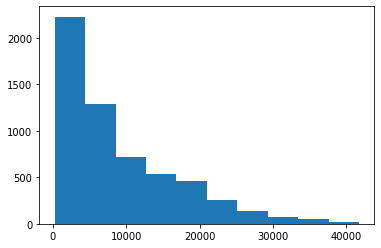

In [25]:
plt.hist(model.predict(X_test))

(array([3134.,  830.,  352.,  770.,  277.,  141.,   97.,   66.,   35.,
          73.]),
 array([   58. ,  5052.2, 10046.4, 15040.6, 20034.8, 25029. , 30023.2,
        35017.4, 40011.6, 45005.8, 50000. ]),
 <BarContainer object of 10 artists>)

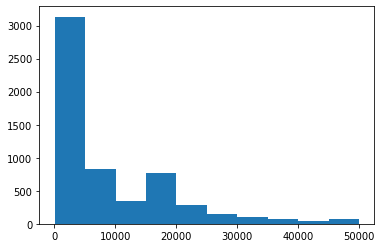

In [26]:
plt.hist(y_test)

In [27]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_ridge,coef_lasso
topic_0,421,420
topic_1,46,46
topic_2,1,0
topic_3,654,653
topic_4,422,421
topic_5,-478,-479
topic_6,133,133
topic_7,-291,-292
topic_8,-386,-386
topic_9,371,370
